<a href="https://colab.research.google.com/github/ramrakhyaniRiya/Capstone_2/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Dataset

In [ ]:
file_path = '/content/drive/MyDrive/CAPSTONE 2/SeoulBikeData.csv'
df=pd.read_csv(file_path,encoding='iso-8859-1')

# Summary of the datad

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Description about the columns

**The Features:**

**Date** : *The date of the day, from 01/12/2017 to 30/11/2018, format: DD/MM/YYYY, type: str*. 
Hence, we need to convert it into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour (dependent variable in this case), type : int*

**Hour**: *The hour of the day, starting from 0 to 23. It is in a digital time format, type : int*.
we need to convert it into category data type.

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *10-m-visibility means that a person should be able "to see and identify" in the daytime "a prominent dark object against the sky at the horizon" and at night "a known, preferably unfocused, moderately intense light source" that's 10m away, type : int*

**Dew point temperature(°C)**: *Temperature at the beginning of the day, type : Float*

**Solar Radiation (MJ/m2)**: *The Total Daily Solar Radiation displays the integrated solar radiation (MJ/m2)(megajoules per square m) for each Mesonet station for the previous day, type : Float*

**Rainfall(mm)**: *Amount of rain in mm, type : Float*

**Snowfall (cm)**: *Amount of snow in cm, type : Float*

**Seasons**: *Season of the year, type : str.*
 There are 4 seasons namely, summer, winter, autumn and spring in the data. 

**Holiday**: *Whether the day falls in holiday period or not, type: str*

**Functioning Day**: *Whether the day is a Functioning Day or not, type : str*


# Pre-processing of The *Data*

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values, hence checking missing values at first is a must!!*** 

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

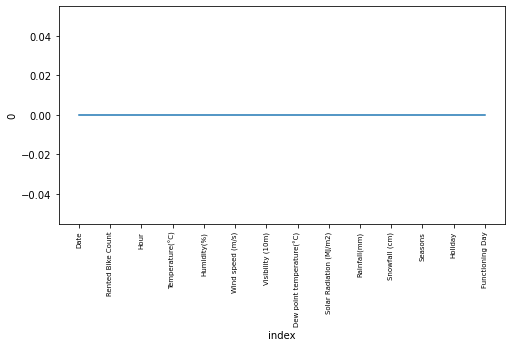

In [ ]:
a = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(8,4))
b =sns.lineplot('index',0,data=a)
plt.xticks(rotation =90,fontsize =7)

# As we can see There are no missing values in dataset

# Creating Heatmap and find co-relation between different columns with each other

* **We check correlation between variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.**

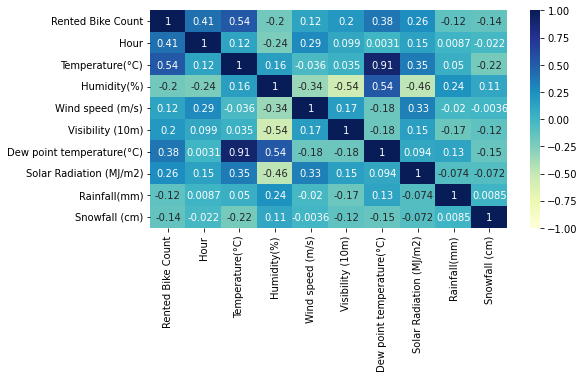

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), vmin=-1, cmap='YlGnBu', annot=True)

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the rented bikes are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall



* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column, it won't affect the outcome of our analysis. Also, they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

##**Changing column names:**

In [ ]:
df = df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
                          'Temperature(°C)' :'Temperature',
                          'Humidity(%)':'Humidity',
                          'Wind speed (m/s)': 'Wind_Speed',
                          'Visibility (10m)':'Visibility',
                          'Dew point temperature(°C)':'Dew_point_temperature',
                          'Solar Radiation (MJ/m2)':'Solar_Radiation',
                          'Rainfall(mm)':'Rainfall',
                          'Snowfall (cm)':'Snowfall',
                          'Functioning Day':'Functioning_Day'})

# **Breaking the date column**

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

* ***The "date" column is splitted into 3 different columns namely, "year","month","day".***
* ***The "year" column in our dataset has the details from December 2017 to  November 2018. It is practically a year time, hence we don't need the "year" column so we drop it***.
* ***The next column "day" contains the details of each day of the month, for our relevance we don't need each day of every month data but we need to know whether a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [ ]:
df.dtypes

Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_Speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
Day                        int64
Month                      int64
Year                       int64
dtype: object

In [ ]:
df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_Speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
Day                        31
Month                      12
Year                        2
dtype: int64

## ***EDA***
**Why do we perform EDA?**
* ***Exploratory data analysis (EDA) is performed to analyze and investigate datasets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers required, making it easier to discover patterns, spot anomalies, test a hypothesis, or check assumptions.***

* ***EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. .***

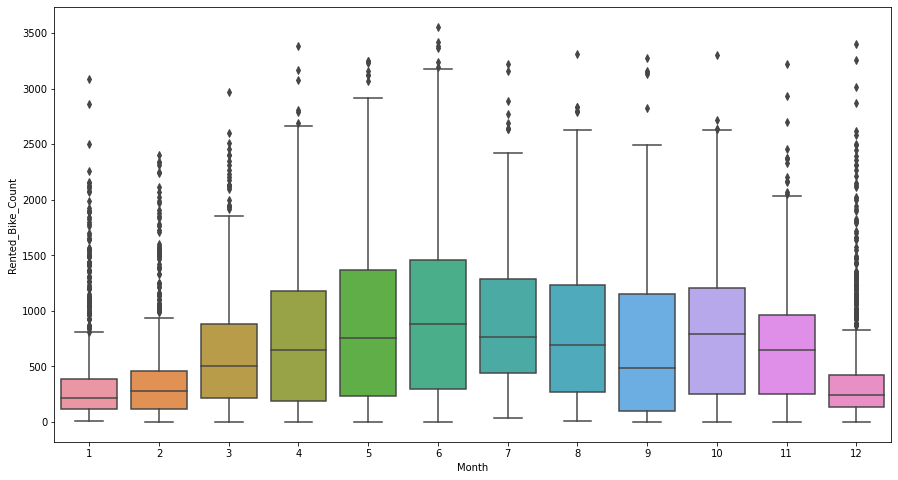

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(y = "Rented_Bike_Count", x = "Month", data = df)
plt.show()

**From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

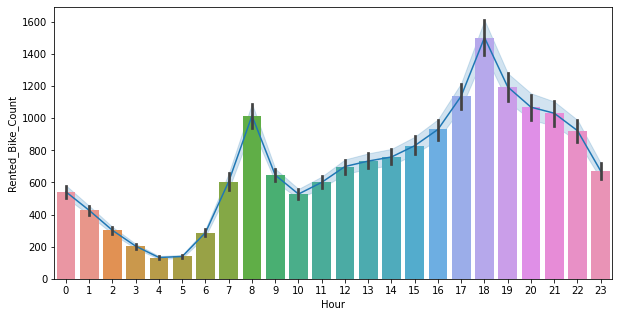

In [ ]:
# bar plot between hour and rented bike count
plt.figure(figsize = (10,5))
sns.lineplot( x = df['Hour'], y = df['Rented_Bike_Count'])
sns.barplot(x = df['Hour'], y = df['Rented_Bike_Count'])


**COMMENT:**
* *The above plot shows ***the count of rented bikes as a function of time*** (hour of the day) over the entire year.*

* *It can be clearly seen that generally* ***people use rented bikes during working hours, i.e from 7am to 9am(peak at 8am) and 5pm to 7pm(peak at 6pm)***.
*It can be well-interpreted from the rise in demand at 8am(start of work) and 6pm(end of work).*  
* *The **demand for the bikes is at its peak at 6pm**(at the leaving time from work).* 
* *The demand is **more at the night time**, which is easy to comprehend from the graph.*

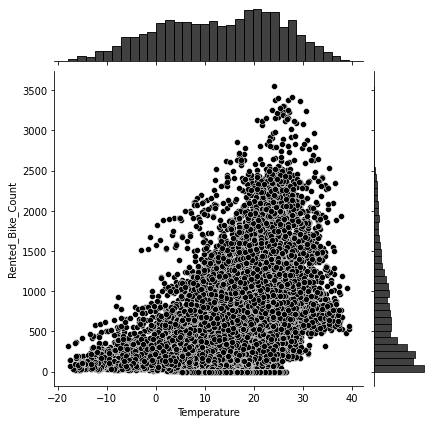

In [ ]:
sns.jointplot(data=df, x='Temperature', y='Rented_Bike_Count' , color = 'black')

**COMMENT:**

* *From the above plot it is clear that* ***people rent bikes when it is pretty hot around (30°C on average).***


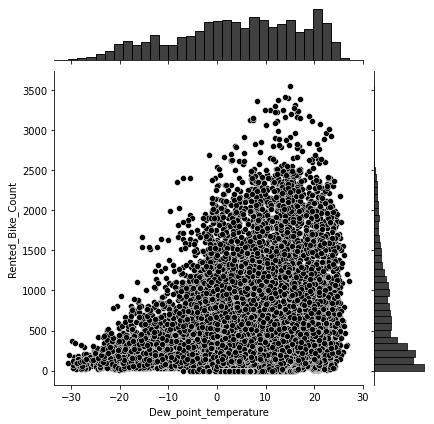

In [ ]:
sns.jointplot(data=df, x='Dew_point_temperature', y='Rented_Bike_Count' , color = 'black')

**COMMENT:**
* ***Both Temperature and Dew_point_temperature show a similar trend.***

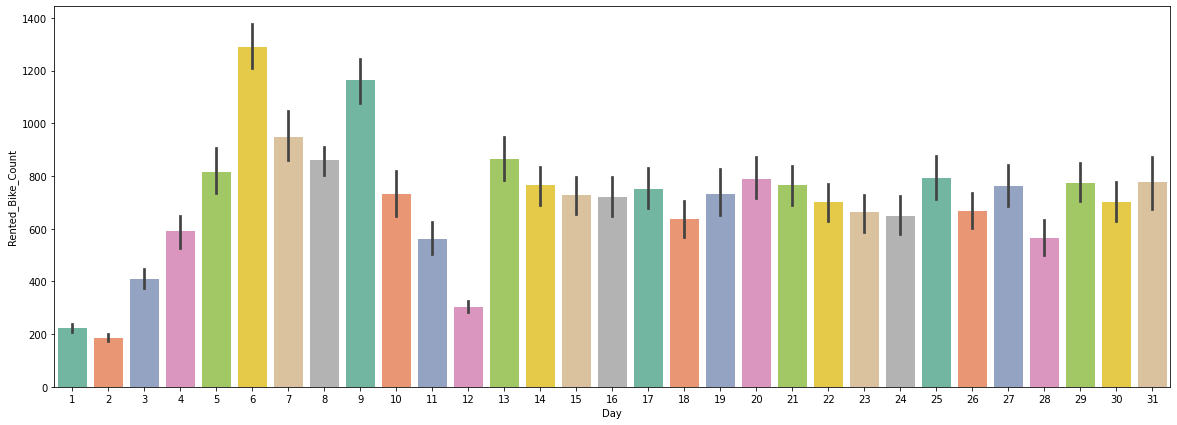

In [ ]:
plt.figure(figsize = (20,7))
sns.barplot(x = 'Day', y = 'Rented_Bike_Count', data = df,palette = 'Set2')

<Figure size 1440x504 with 0 Axes>

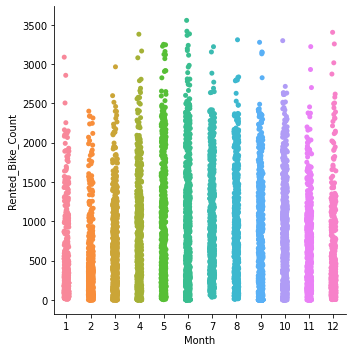

In [ ]:
plt.figure(figsize = (20,7))
sns.catplot(x = 'Month', y = 'Rented_Bike_Count', data = df)

**COMMENT:**
* *From the above bar plot we can clearly say that* ***the demand of the rented bikes is comparatively high for the months 5-10(May-October) than other months.***
* *Also, we can see that* ***these months are a part of summer season.***

<Figure size 1440x504 with 0 Axes>

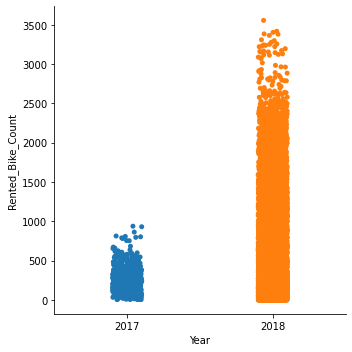

In [ ]:
plt.figure(figsize = (20,7))
sns.catplot(x = 'Year', y = 'Rented_Bike_Count', data = df)


**COMMENT:**
* In general, the number of bike rents in 2017 was less than in 2018. The bike rents peaked in July 2018 then reduced slightly until December 2017.

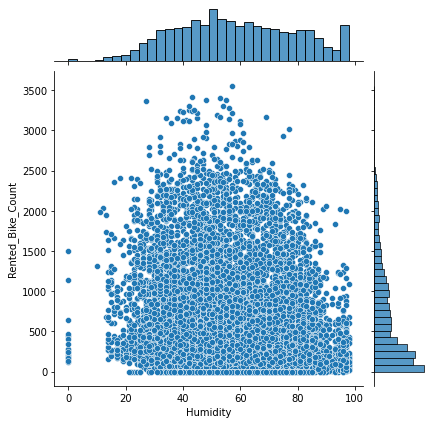

In [ ]:
sns.jointplot(data=df, x="Humidity", y="Rented_Bike_Count")

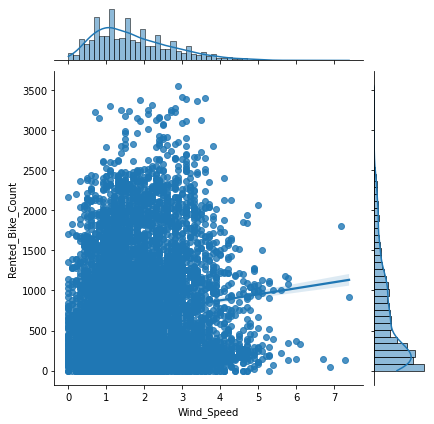

In [ ]:
sns.jointplot(data=df, x="Wind_Speed", y="Rented_Bike_Count",kind='reg')

**COMMENT:**
* *We can see from the above plot that the* ***demand of rented bike is nearly uniformly distributed despite wind speed.***
* *Also*  ***when the speed of wind is 7 m/s-8m/s the demand of bike also descreased(at its peak)*** *which clearly means people like renting bikes when it is a little windy.*

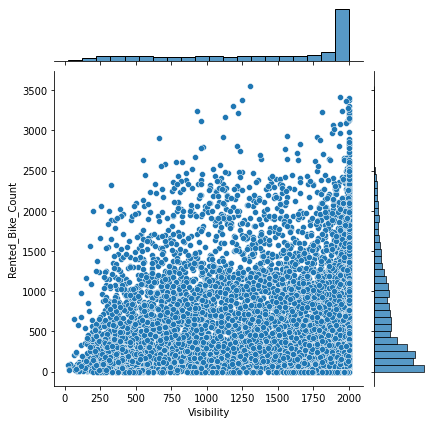

In [ ]:
sns.jointplot(data=df, x="Visibility", y="Rented_Bike_Count")

<Figure size 720x288 with 0 Axes>

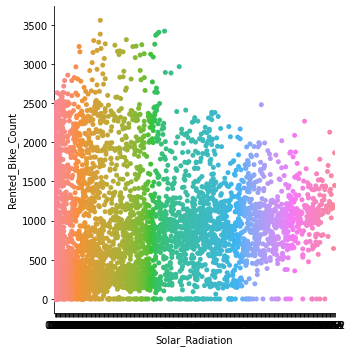

In [ ]:
plt.figure(figsize = (10,4))
sns.catplot(x = 'Solar_Radiation', y = 'Rented_Bike_Count', data = df)

From the above plot we see that, the number of rented bikes is huge, when there is solar radiation, the count of rented bikes has a mean around 1000

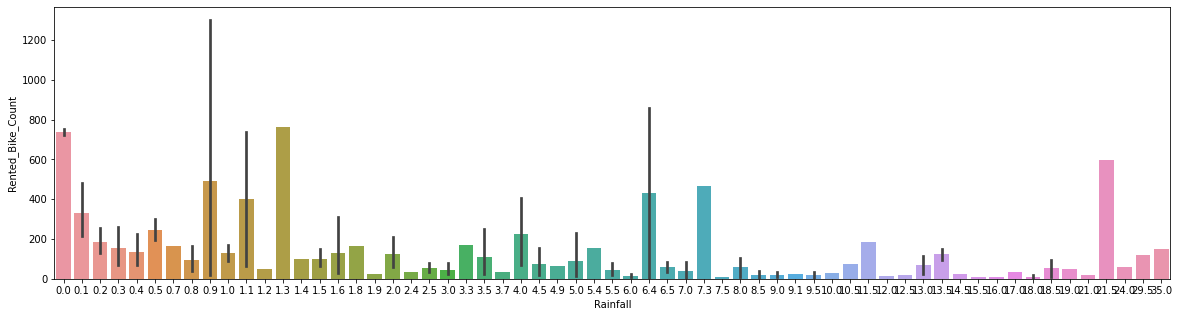

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Rainfall',y='Rented_Bike_Count',data=df)


**COMMENT:**

When there is rainfall 0.9 mm the demand of rental bikes are in demand
* *We can see from the above plot that* ***there is a fluctuation in the demand of rented bikes as far as rainfall is concerned, here e.g even if there is 22 mm of rain there is a big peak of rented bikes.***
* *We can also see that the* ***demand for rented bikes is the highest when there is no/slight rain.***

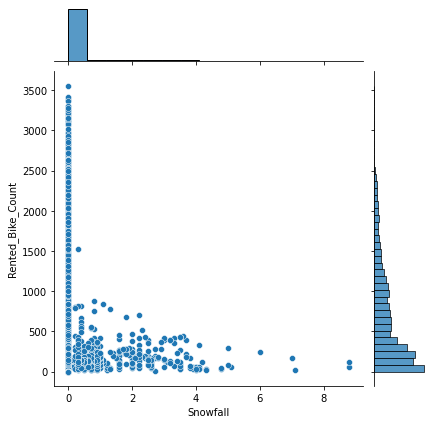

In [ ]:
sns.jointplot(data=df, x="Snowfall", y="Rented_Bike_Count")

**COMMENT:**
* *We can see from the plot that,* ***the number of rented bike is very low When there is more than 4 cm of snow and the demand of rented bikes is the highest when there is no snow***

In [ ]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

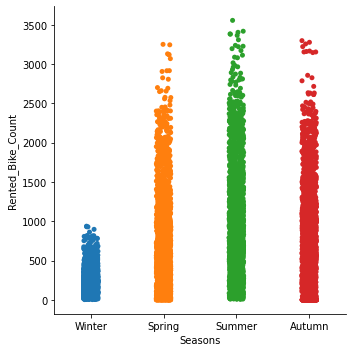

In [ ]:
sns.catplot(data=df, x="Seasons", y="Rented_Bike_Count")


**COMMENT:**
* *In the above bar plot represents the use of rented bikes in four different seasons, and it clearly shows that:* ***the use of rented bikes is the highest during summers.***

* *The use of rented bike is **very low in winters** probably because of snowfall.*

In [ ]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

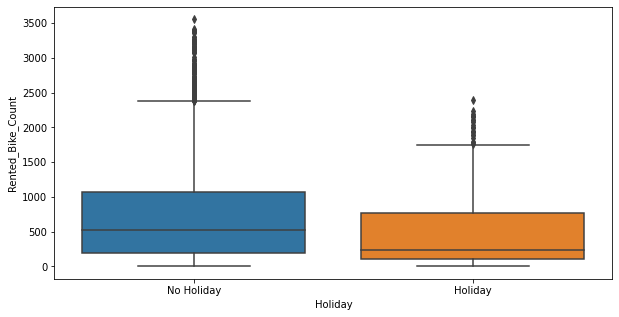

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Holiday', y = 'Rented_Bike_Count',data= df)

Majority of the data is from non-holiday days
**COMMENT:**
* *The above bar plot and point plot represent the use of rented bikes during a holiday, and it clearly depicts that* ***rented bikes are preferred more when there is no holiday(working day).***

In [ ]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

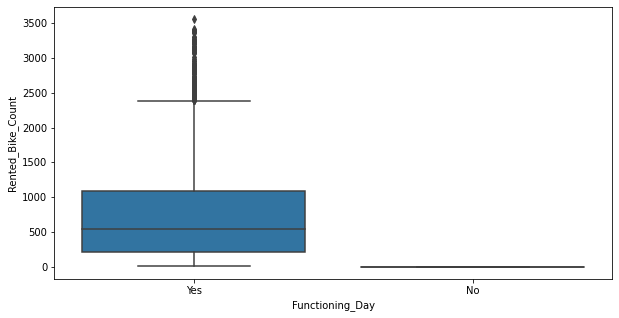

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Functioning_Day', y = 'Rented_Bike_Count',data= df)

Majority of the data is for Functioning Days.
**COMMENT:**
* *The above bar plot clearly depicts that ***people do not rent bikes on non-functional days***.*

In [ ]:
df.dtypes

Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_Speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
Day                        int64
Month                      int64
Year                       int64
dtype: object

In [ ]:
# Categorical Column
cat_col = [i for i in df.columns if df[i].dtype=='O']
cat_col

['Seasons', 'Holiday', 'Functioning_Day']

In [ ]:
# Continuous Column
cont_col = [i for i in df.columns if df[i].dtype!='O']
cont_col

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Day',
 'Month',
 'Year']



---



---




###***Creating the dummy variables:***
*A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.*

####***One hot encoding:***
* *It allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.*

In [ ]:
df = pd.get_dummies(df,columns = ['Seasons', 'Holiday', 'Functioning_Day'])

In [ ]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,...,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1


In [ ]:
df.dtypes

Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_Speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Day                        int64
Month                      int64
Year                       int64
Seasons_Autumn             uint8
Seasons_Spring             uint8
Seasons_Summer             uint8
Seasons_Winter             uint8
Holiday_Holiday            uint8
Holiday_No Holiday         uint8
Functioning_Day_No         uint8
Functioning_Day_Yes        uint8
dtype: object

In [ ]:
x = df.drop('Rented_Bike_Count',axis=1)
x.head() #dependent data

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1


In [ ]:
y = df['Rented_Bike_Count'] #independent data
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [ ]:
def plot(df,col):
  fig,(ax1,ax2)=plt.subplots(2,1) 
  sns.distplot(df[col],ax = ax1)
  sns.boxplot(df[col],ax = ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


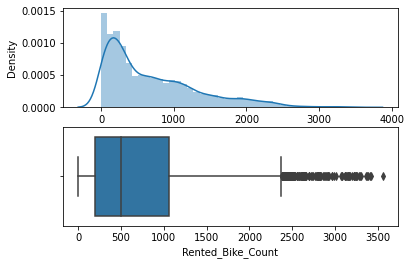

In [ ]:
plot(df,'Rented_Bike_Count')

**COMMENT:**
* *In the box plot, the* ***median*** *is represented inside the Red rectangle by a thick grey line and* ***has a value of 504.5,*** *as we can verify from the table above which describes the data.* 
* *The value of the* ***first quartile is 191*** *and* ***the value of the third quartile is 1065.25***
* ***There are many outliers*** *displayed above the upper whisker that are marked with circles.*

# **MODEL IMPLEMENTATION:**
## ***1. Linear Regression***

###**Overview**
*Linear Regression is a machine learning algorithm based on supervised learning. It is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables(also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression. In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models. We will use this model to predict the required number of rental bikes required at each hour.*

*Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.*

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where$$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$

###**Method**
* *From Seoul Bike Data df, we create a new Dataframe X containing all the columns except Rented Bike Count(because it is our dependent variable) and a Series y containing only the Rented Bike Count column. These will be our design matrix and target respectively for our linear regression model.*

* *We perform a test-train split to create X_train, X_test, y_train and y_test.*

* *The rental bike data is therefore partitioned into two namely, training set for building the regression and testing set for assessing the model performance. Usually larger part of data is needed to teach the models and so the 75% of the final data is utilized for model training and the remaining 25% of the data is used for testing purpose, these are the same proportions used in the research article.*


## ***2. Decision Tree Regression Model***

###**Overview**
*Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.*

###**Method**
*We create and train a Decision Tree Regressor with max_depth=6. Then, by using X_train, X_test, y_train and y_test we computed for the Linear Regression test, we predict the test data y_pred_tree by using the Deciosion Tree Regressor.*

*We also compute the residual for this model, which we call resid_tree.*

## Importing Sklearn Models

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
mutual_info_classif(x,y)

array([0.25359439, 0.32771751, 0.11522488, 0.04303119, 0.13583868,
       0.20581971, 0.13638204, 0.04260654, 0.02356426, 0.10425065,
       0.18904181, 3.01549736, 0.26052283, 0.10863165, 0.27872588,
       0.35939954, 0.01900043, 4.07968888, 0.15776745, 4.47058831])

In [ ]:
imp = pd.DataFrame(mutual_info_classif(x,y),index = x.columns)
imp

,0
Hour,0.251503
Temperature,0.326100
Humidity,0.111740
Wind_Speed,0.039990
Visibility,0.139808
Dew_point_temperature,0.207077
Solar_Radiation,0.143381
Rainfall,0.055943
Snowfall,0.019323
Day,0.105353


In [ ]:
imp.columns = ['Importance']
imp.sort_values(by='Importance',ascending = False)

,Importance
Functioning_Day_Yes,4.395483
Holiday_No Holiday,3.978791
Year,3.128071
Seasons_Winter,0.363815
Temperature,0.326100
Seasons_Summer,0.268258
Seasons_Autumn,0.267052
Hour,0.251503
Dew_point_temperature,0.207077
Month,0.190109


In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.25)

In [ ]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(x_train , y_train)
    print('Training score: {}'.format(model.score(x_train , y_train)))

    predictions = model.predict(x_test)
    print('Predictions are:{}'.format(predictions))

    print('\n')

    r2_score = metrics.r2_score(y_test,predictions)
    print('r2 score is:{}'.format(r2_score))

    print('MAE',metrics.mean_absolute_error(y_test,predictions))
    print('MSE',metrics.mean_squared_error(y_test,predictions))
    print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)

**COMMENT:**
* *We compute and print the values of the following parameters:*

* ***Root Mean Squared Error (RMSE),***
* ***Mean Absolute Error (MAE),***
* ***Rsquared (R2).***
* ***Mean Squared Error(MSE)***

Training score: 0.5499481008050592
Predictions are:[ 516.06141924 1312.26698939  584.20604993 ...   11.14006911  806.99232804
 1648.51945536]


r2 score is:0.5550327802070185
MAE 317.68979870818265
MSE 175891.7690737928
RMSE 17.82385476568362


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


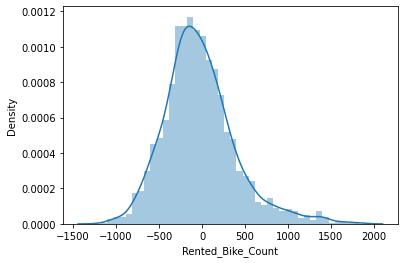

In [ ]:
predict(LinearRegression())

Training score: 1.0
Predictions are:[ 218. 1801.  343. ...   35.  916. 1994.]


r2 score is:0.7645991886416312
MAE 173.85068493150686
MSE 93051.94474885844
RMSE 13.185244970477676


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


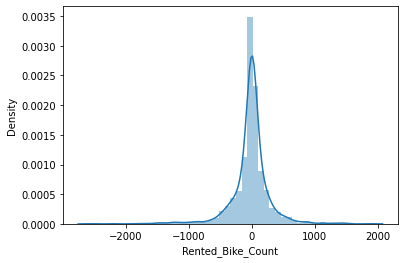

In [ ]:
predict(DecisionTreeRegressor())

Training score: 0.9825597241415972
Predictions are:[ 266.03 1709.1   670.43 ...   71.97  842.08 1787.11]


r2 score is:0.8753507114881548
MAE 136.13735159817352
MSE 49272.80683808219
RMSE 11.6677912047728


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


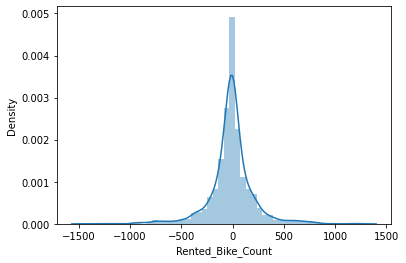

In [ ]:
predict(RandomForestRegressor())

# ***Conclusions*** 

• During the time of our analysis, we initially did EDA on all the features of our dataset. We first
analysed our dependent variable, 'Rented Bike Count' and also transformed it.

• Next we analysed categorical variable and dropped the variable which had majority of one class, we
also analysed numerical variable, found out the correlation, distribution and their relationship with
the dependent variable.

• We also removed some numerical features which had mostly 0 values and hot encoded the
categorical variables.

• However, this is not the ultimate end. As this data is time dependent, the values for variables like
temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be
scenarios where the model might not perform well.

• As Machine learning is an exponentially evolving field, we will have to be prepared for all
contingencies and also keep checking our model from time to time.

• Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would
surely help one to stay a step ahead in future.